In [1]:
#importing relevant libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [11]:
#Checking for NULL values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
order_id          5000 non-null int64
shop_id           5000 non-null int64
user_id           5000 non-null int64
order_amount      5000 non-null int64
total_items       5000 non-null int64
payment_method    5000 non-null object
created_at        5000 non-null object
dtypes: int64(5), object(2)
memory usage: 273.5+ KB


I am interested in understanding where that AOV of $3145.13 came from. Thus, I will use describe() method to get to know what exactly happened in my data.

In [16]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


From the above table, we can observe that mean of the order_amount is also $3145.13. Thus, we can say that due to the high value of mean of order_amount, AOV is also high. Another point to notice here is the huge standard deviation from mean which is 41282.53, making mean not so useful metric.
Also, we can see that the minimum order_amount is 90 and maximum is 704000 which is very large as compared to all other ranges.
Thus, this makes clear that there are probably few outliers in the data which needs to be treated.

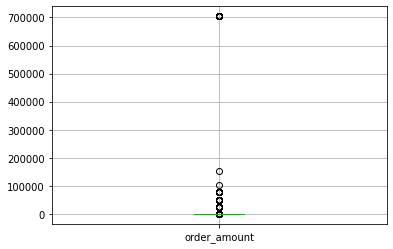

In [23]:
df.boxplot('order_amount')

From the boxplot above, we can see that the entire box plot is a line along 0 showing us that there are a lot of outliers in the data.

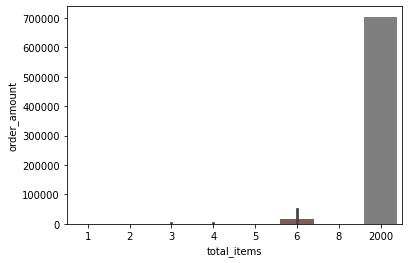

In [25]:
sns.barplot(x='total_items',y='order_amount',data=df)

Here, we can see that the there are few orders which are of high amount and are ordered in a bulk. Lets now dive deep into the data.

In [26]:
orders = df.groupby(['order_amount']).size().reset_index(name='nums').sort_values(by='order_amount', ascending=False)
orders.head(10)

,order_amount,nums
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


Again,we can clearly see that order of high amounts are repeated few times.

In [28]:
df.loc[df['order_amount']==704000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


In [29]:
df.loc[df['order_amount']==51450]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
1529,1530,78,810,51450,2,cash,2017-03-29 7:12:01
2452,2453,78,709,51450,2,cash,2017-03-27 11:04:04
2495,2496,78,707,51450,2,cash,2017-03-26 4:38:52
2512,2513,78,935,51450,2,debit,2017-03-18 18:57:13
2818,2819,78,869,51450,2,debit,2017-03-17 6:25:51
2821,2822,78,814,51450,2,cash,2017-03-02 17:13:25


In [30]:
df.loc[df['order_amount']==25725]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1384,1385,78,867,25725,1,cash,2017-03-17 16:38:06
1419,1420,78,912,25725,1,cash,2017-03-30 12:23:43
1452,1453,78,812,25725,1,credit_card,2017-03-17 18:09:54
2270,2271,78,855,25725,1,credit_card,2017-03-14 23:58:22
2548,2549,78,861,25725,1,cash,2017-03-17 19:36:00
2773,2774,78,890,25725,1,cash,2017-03-26 10:36:43


From the above tables, it is clearly visible that order amount of $704000 is done by same user from the same shop and at the same time. Seems like it is some supplier purchasing 2000 shoes at once.

And again for the order amount of $51450 and $25725, from a single shop different users are purchasing pair of shoes worth $25725.

Now that we know what was going wrong with the AOV, let's clean the data and again do the calculations to get the clear imaage.

Box plot use the IQR method to display data and outliers but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data. As we will have the IQR scores, it’s time to get hold on outliers.

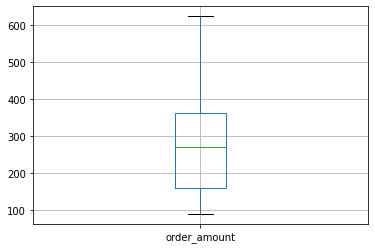

In [31]:
q1 = df.order_amount.quantile(q=0.25)
q2 = df.order_amount.quantile(q=0.5)
q3 = df.order_amount.quantile(q=0.75)
IQR = q3 - q1
df_new = df[(df.order_amount < q2 + IQR * 1.5) & (df.order_amount > q2 - IQR * 1.5)]
df_new.boxplot(column='order_amount')

Above we can see relatively accurate presentation of our dataset.

Q1. A. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

ANS. >> While calculating the AOV, we are just computing the average order amount without taking into account the number 
of pairs of shoes purchased in each order.
     >>The 17 indentical transactions that included 2000 purchases each are driving up the AOV.
     >>And the purchase of an expensive product in different numbers is also increasing the AOV.
     >>Due to the extreme points it would be preferable to use a robust evaluation metric .
    
    
    
   B.What metric would you report for this dataset?
   
ANS. >>Looking at the box plot for df_new, it looks like the distribution is skewed towards lower values. With this in mind, I would report the median value of the new dataset. The values above the median will increase the mean a disproportionate amount.

   C.What is its value?
   
ANS. >>The median value comes out to be $272

In [32]:
df_new.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4738.000000,4738.000000,4738.000000,4738.000000,4738.00000
mean,2500.866399,49.770367,850.325876,283.814268,1.89848
std,1444.266056,29.149727,86.802461,132.061996,0.86278
min,1.000000,1.000000,700.000000,90.000000,1.00000
25%,1247.250000,24.000000,776.000000,161.000000,1.00000
50%,2502.500000,50.000000,851.000000,272.000000,2.00000
75%,3755.750000,74.000000,926.000000,362.000000,2.00000
max,5000.000000,100.000000,999.000000,624.000000,5.00000


Q2. a. How many orders were shipped by Speedy Express in total?
    ANS. 54
    SELECT COUNT(*) AS NumberOfOrders FROM [Orders] JOIN [Shippers] ON [Shippers].ShipperID = [Orders].ShipperID
    WHERE [Shippers].ShipperName = 'Speedy Express'
    
    b. What is the last name of the employee with the most orders?
    ANS. Peacock 
    SELECT [Employees].LastName, COUNT(*) AS NumberOfOrders
    FROM [Orders] JOIN [Employees] ON [Orders].EmployeeID = [Employees].EmployeeID GROUP BY [Employees].LastName
    ORDER BY NumberOfOrders DESC LIMIT 1

    c. What product was ordered the most by customers in Germany?
    ANS. Boston Crab Meat
    
    SELECT p.ProductID, p.ProductName, SUM(Quantity) AS TotalQuantity
    FROM Orders AS o, OrderDetails AS od, Customers AS c, Products AS p
    WHERE c.Country = "Germany" AND od.OrderID = o.OrderID AND od.ProductID = p.ProductID AND c.CustomerID = o.CustomerID
    GROUP BY p.ProductID
    ORDER BY TotalQuantity DESC
    LIMIT 1;